# 5.2 Using Support Vector Machine as Regression
## Step 1. Load the dataset used at Lab4.

In [1]:
#dataset : Medical Cost Personal Datasets (https://www.kaggle.com/mirichoi0218/insurance/data)
import pandas as pd
insurance = pd.read_csv('D:/ML_project/datasets/insurance/insurance.csv')
X=insurance.drop(['sex','smoker','region','charges'],axis=1).values
y=insurance.charges.values
X

array([[19.  , 27.9 ,  0.  ],
       [18.  , 33.77,  1.  ],
       [28.  , 33.  ,  3.  ],
       ...,
       [18.  , 36.85,  0.  ],
       [21.  , 25.8 ,  0.  ],
       [61.  , 29.07,  0.  ]])

In [2]:
#Do preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
X_prepared = num_pipeline.fit_transform(X) #정제된 X

D:\Python\anaconda\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
#training set & test set 나누기
from sklearn.model_selection import train_test_split
import numpy as np
X_train , X_test , y_train , y_test = train_test_split(X_prepared,y,test_size=0.2,random_state=42)

## Step 2. Train linearSVR and SVR using the dataset.

In [4]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
#LinearSVR
lin_svr = LinearSVR(epsilon=1.5,random_state=42)
#SVR
svm_poly_reg = SVR(kernel='poly',degree=3 ,coef0=1, C=5)
svm_rbf_reg = SVR(kernel='rbf',gamma=5, C=0.001)

In [5]:
#LinearSVR
lin_svr.fit(X_train,y_train)
#SVR
svm_poly_reg.fit(X_train,y_train)
svm_rbf_reg.fit(X_train,y_train)

D:\Python\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=5,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Step 3. Find dataset's shape and compare accuracy

- 아래는 그래프를 그리기 위함

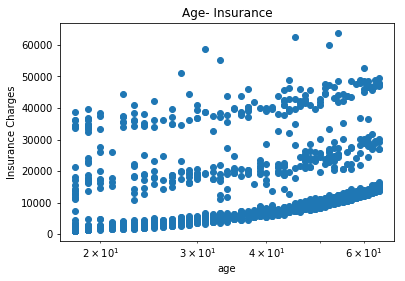

In [6]:
#그래프를 그리기위한 준비
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# Age - Insurance charges graph
plt.scatter(X[:,0],y)
plt.xscale('log') 
# Strings
xlab = 'age'
ylab = 'Insurance Charges'
title = 'Age- Insurance'
# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
# Add title
plt.title(title)
plt.show()

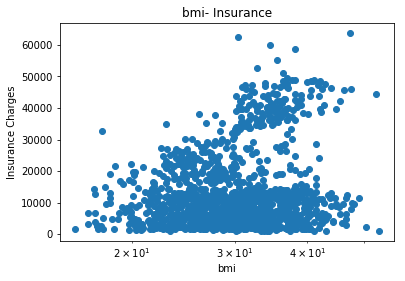

In [7]:
# BMI - Insurance charges Graph
plt.scatter(X[:,1],y)
plt.xscale('log') 
# Strings
xlab = 'bmi'
ylab = 'Insurance Charges'
title = 'bmi- Insurance'
# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
# Add title
plt.title(title)
plt.show()

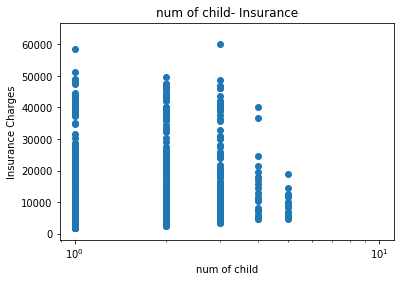

In [8]:
# Num of child - Insurance charges Graph
plt.scatter(X[:,2],y)
plt.xscale('log') 
# Strings
xlab = 'num of child'
ylab = 'Insurance Charges'
title = 'num of child- Insurance'
# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
# Add title
plt.title(title)
plt.show()

In [12]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

In [13]:
plot_svm_regression(svm_rbf_reg,X[:,0],y,[10,70,1000,70000])
plt.show()

ValueError: X.shape[1] = 1 should be equal to 3, the number of features at training time

In [9]:
#Find Coefficience and intercept values.
print('LinearSVR 의 coef & intercept')
print('coef : {}'.format(lin_svr.coef_))
print('intercept : {}'.format(lin_svr.intercept_))

LinearSVR 의 coef & intercept
coef : [ 11.4265671  -18.07928331  11.15144965]
intercept : [1070.]


In [10]:
print("SVR('poly') 의 intercept")
print('intercept : {}'.format(svm_poly_reg.intercept_))

SVR('poly') 의 intercept
intercept : [7289.23384]


In [11]:
print("SVR('rbf') 의 intercept")
print('intercept : {}'.format(svm_rbf_reg.intercept_))

SVR('rbf') 의 intercept
intercept : [9575.44154959]


In [12]:
#case1 : Compare prediction results using same data.
some_data = X_test[13] #예제 data
some_labels = y_test[13] #실제 label : 46151.1245
some_data , some_labels

(array([0.48366788, 1.91712274, 1.58092576]), 46151.1245)

In [13]:
# 예제 데이터의 predict 값을 출력하는 함수
def gotPredict(data):
    print('Prediction of some_data')
    print('LinearSVR : {}'.format(lin_svr.predict(data)))
    print('poly Kernel SVR : {}'.format(svm_poly_reg.predict(data)))
    print('rbf Kernel SVR : {}'.format(svm_rbf_reg.predict(data)))
gotPredict([some_data])

Prediction of some_data
LinearSVR : [1058.49607237]
poly Kernel SVR : [9573.46383282]
rbf Kernel SVR : [9575.44190215]


In [14]:
#compare RMSE (cross_val)
from sklearn.model_selection import cross_val_score
lin_mse = cross_val_score(lin_svr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse = np.sqrt(-lin_mse)
poly_mse = cross_val_score(svm_poly_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
poly_rmse = np.sqrt(-poly_mse)
rbf_mse = cross_val_score(svm_rbf_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rbf_rmse = np.sqrt(-rbf_mse)

D:\Python\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Python\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Python\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Python\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of

In [15]:
#print RMSE
print('RMSE 비교')
print('LinearSVR : {}'.format(lin_rmse.mean()))
print('poly Kernel SVR : {}'.format(poly_rmse.mean()))
print('rbf Kernel SVR : {}'.format(rbf_rmse.mean()))

RMSE 비교
LinearSVR : 17222.170617703683
poly Kernel SVR : 12746.822641391165
rbf Kernel SVR : 12562.198793944477


- SVR('rbf') is best model

## Step 4. Find the best hyperparameters in the picked model.

In [16]:
#grid search
from sklearn.model_selection import GridSearchCV
rbf_kernel = SVR(kernel='rbf')
param_grid = [
    {'gamma': [1,5,10], 'C': [0.01,0.1,1,10,100,200]}
  ]
grid = GridSearchCV(rbf_kernel,param_grid,cv=5,scoring='neg_mean_squared_error', return_train_score=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [1, 5, 10], 'C': [0.01, 0.1, 1, 10, 100, 200]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [17]:
cvres = grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
print('##########################################################')
print('Best hyperparameter: {}'.format(grid.best_params_))

12600.965193086675 {'C': 0.01, 'gamma': 1}
12600.975935440829 {'C': 0.01, 'gamma': 5}
12600.97847474768 {'C': 0.01, 'gamma': 10}
12600.81142640943 {'C': 0.1, 'gamma': 1}
12600.918394266933 {'C': 0.1, 'gamma': 5}
12600.943766491195 {'C': 0.1, 'gamma': 10}
12598.655857776566 {'C': 1, 'gamma': 1}
12600.323979851917 {'C': 1, 'gamma': 5}
12600.597635549795 {'C': 1, 'gamma': 10}
12590.016927297249 {'C': 10, 'gamma': 1}
12595.61020903964 {'C': 10, 'gamma': 5}
12597.012047409542 {'C': 10, 'gamma': 10}
12825.67045796122 {'C': 100, 'gamma': 1}
12610.404890726166 {'C': 100, 'gamma': 5}
12603.983204208545 {'C': 100, 'gamma': 10}
12926.014716699598 {'C': 200, 'gamma': 1}
12675.868570323955 {'C': 200, 'gamma': 5}
12613.444742594425 {'C': 200, 'gamma': 10}
##########################################################
Best hyperparameter: {'C': 10, 'gamma': 1}


- best hyperparameter of SVR (kernel='rbf') is C:10 , gamma:1